In [5]:
#Import the following libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.api as sms
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.stats.multicomp as mc
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from scipy import stats
from scipy.stats import f_oneway


# Data Cleaning and Transformation

In [6]:
#Read the file
data = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

In [8]:
# Calculate the sum of the two columns, 'Actions_at_arrest___Combative__' and 'Actions_at_arrest___Assaulted_o' to a new column "Aggression_Level" to measure the aggressiveness level
data["Aggression_Level"] = data['Actions_at_arrest___Combative__'] + data['Actions_at_arrest___Assaulted_o']

In [9]:
#Removed all columns except interested ones
data = data.loc[:, data.columns.intersection(['Sex','Age_group__at_arrest_','Aggression_Level'])]
data.shape


(65276, 3)

In [10]:
#Delete rows with unclear sex of gender and nan values
data = data.loc[data["Sex"] != "U"]
data = data.dropna(axis = 0)
data.shape

(65243, 3)

In [11]:
#Change all "Aged 17 years and under" and "Aged 17 years and younger" to "Aged 17 and youger" in the "Age_group__at_arrest_" column
data['Age_group__at_arrest_'] = data['Age_group__at_arrest_'].replace('Aged 17 years and under','Aged 17 and younger')
data['Age_group__at_arrest_'] = data['Age_group__at_arrest_'].replace('Aged 17 years and younger','Aged 17 and younger')

In [12]:
#Change all "Aged 65 years and older" to "Aged 65 and older" in the "Age_group__at_arrest_" column
data['Age_group__at_arrest_'] = data['Age_group__at_arrest_'].replace('Aged 65 years and older','Aged 65 and older')

In [13]:
data.head

<bound method NDFrame.head of       Sex Age_group__at_arrest_  Aggression_Level
0       M   Aged 35 to 44 years                 0
1       M   Aged 35 to 44 years                 0
2       M   Aged 35 to 44 years                 0
3       M   Aged 25 to 34 years                 0
4       M   Aged 25 to 34 years                 0
...    ..                   ...               ...
65271   F   Aged 25 to 34 years                 0
65272   M   Aged 35 to 44 years                 0
65273   F   Aged 45 to 54 years                 0
65274   M   Aged 17 and younger                 0
65275   M   Aged 18 to 24 years                 0

[65243 rows x 3 columns]>

In [14]:
print(data['Age_group__at_arrest_'].unique())

['Aged 35 to 44 years' 'Aged 25 to 34 years' 'Aged 45 to 54 years'
 'Aged 55 to 64 years' 'Aged 18 to 24 years' 'Aged 65 and older'
 'Aged 17 and younger']


# EDA

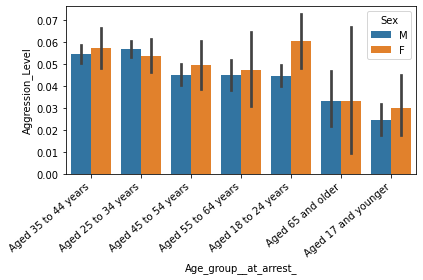

In [15]:
ax = sns.barplot(data=data, x="Age_group__at_arrest_", y="Aggression_Level", hue="Sex")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# ANOVA

In [ ]:
#Perform two-way ANOVA with interaction
model = ols('Aggression_Level ~ C(Sex) + C(Age_group__at_arrest_) + C(Sex):C(Age_group__at_arrest_)', data = data).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),0.100795,1.0,1.784902,1.815532e-01
C(Age_group__at_arrest_),3.666315,6.0,10.820709,4.534492e-12
C(Sex):C(Age_group__at_arrest_),0.404768,6.0,1.194627,3.056266e-01
Residual,3683.523975,65229.0,NaN,NaN


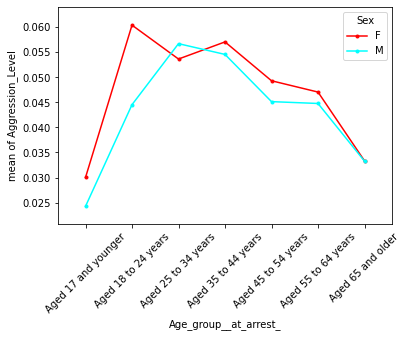

In [ ]:
#Plot an interaction plot
fig = interaction_plot(x = data['Age_group__at_arrest_'], trace = data['Sex'], response = data['Aggression_Level'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Perform two-way ANOVA without interaction
model2 = ols('Aggression_Level ~ C(Sex) + C(Age_group__at_arrest_)', data = data).fit()
sm.stats.anova_lm(model2, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),0.100795,1.0,1.784870,1.815571e-01
C(Age_group__at_arrest_),3.666315,6.0,10.820515,4.536962e-12
Residual,3683.928743,65235.0,NaN,NaN


In [ ]:
#Estimate the means of each age group
print(data.groupby('Age_group__at_arrest_').mean())

                       Aggression_Level
Age_group__at_arrest_                  
Aged 17 and younger            0.025641
Aged 18 to 24 years            0.047814
Aged 25 to 34 years            0.056099
Aged 35 to 44 years            0.055046
Aged 45 to 54 years            0.045886
Aged 55 to 64 years            0.045118
Aged 65 and older              0.033283


In [ ]:
#One-way ANOVA on Sex
#Samples
sample_f = data[data['Sex'] == 'F']['Aggression_Level']
sample_m = data[data['Sex'] == 'M']['Aggression_Level']

#Implement one-way ANOVA
s, p = f_oneway(sample_f, sample_m)

print(f'One-way ANOVA: s = {s}, p = {p}')

One-way ANOVA: s = 1.7142503323620455, p = 0.1904394500165444


#Post-Hoc Tests

In [ ]:
#Running post hoc tukey test for different age groups
tukey = pairwise_tukeyhsd(endog=data["Aggression_Level"], groups=data['Age_group__at_arrest_'], alpha=0.05)
print(tukey)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
Aged 17 and younger Aged 18 to 24 years   0.0222  0.001  0.0077  0.0367   True
Aged 17 and younger Aged 25 to 34 years   0.0305  0.001  0.0169  0.0441   True
Aged 17 and younger Aged 35 to 44 years   0.0294  0.001  0.0156  0.0432   True
Aged 17 and younger Aged 45 to 54 years   0.0202  0.001  0.0056  0.0349   True
Aged 17 and younger Aged 55 to 64 years   0.0195 0.0083  0.0031  0.0359   True
Aged 17 and younger   Aged 65 and older   0.0076    0.9 -0.0154  0.0307  False
Aged 18 to 24 years Aged 25 to 34 years   0.0083 0.0622 -0.0002  0.0168  False
Aged 18 to 24 years Aged 35 to 44 years   0.0072 0.1995 -0.0017  0.0161  False
Aged 18 to 24 years Aged 45 to 54 years  -0.0019    0.9 -0.0121  0.0082  False
Aged 18 to 24 years Aged 55 to 64 years  -0.0027    

In [ ]:
#Running post hoc tukey test for both genders
tukey = pairwise_tukeyhsd(endog=data["Aggression_Level"], groups=data['Sex'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     F      M  -0.0031 0.1904 -0.0077 0.0015  False
---------------------------------------------------


In [18]:
#Research Question 2: Is there a connection between Race, Sex and strip searches and arrests, does being a man or woman or belonging to a specific raceincrease the chances of strip search or getting booked
#H0: There is no difference in the mean number of strip searches for men or women
#H1: There is statistically significant difference between strip searches for men and women
df = pd.read_csv('Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv')
df.head()

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,...,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5


In [19]:
# Having a look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 25 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [20]:
# Lets see how many missing values we have in our dataset
df.isnull().sum()

Arrest_Year                            0
Arrest_Month                           0
EventID                                0
ArrestID                             469
PersonID                               0
Perceived_Race                         4
Sex                                    0
Age_group__at_arrest_                 24
Youth_at_arrest__under_18_years        0
ArrestLocDiv                           0
StripSearch                            0
Booked                                 0
Occurrence_Category                  165
Actions_at_arrest___Concealed_i        0
Actions_at_arrest___Combative__        0
Actions_at_arrest___Resisted__d        0
Actions_at_arrest___Mental_inst        0
Actions_at_arrest___Assaulted_o        0
Actions_at_arrest___Cooperative        0
SearchReason_CauseInjury           57475
SearchReason_AssistEscape          57475
SearchReason_PossessWeapons        57475
SearchReason_PossessEvidence       57475
ItemsFound                         57475
ObjectId        

In [21]:
#Checking some individual columns and seeing if we can optimize them for analysis
df['Occurrence_Category'].value_counts()

Assault                                            7726
Assault & Other crimes against persons             7235
Robbery & Theft                                    4580
Warrant                                            4385
FTA/FTC/Compliance Check/Parollee                  4246
Police Category - Administrative                   3888
FTA/FTC, Compliance Check & Parollee               3877
Robbery/Theft                                      3754
Drug Related                                       2751
Other Statute & Other Incident Type                2344
Vehicle Related (inc. Impaired)                    1977
Other Offence                                      1972
Mischief & Fraud                                   1732
Impaired                                           1362
Harassment/Threatening                             1346
Mischief                                           1322
Harassment & Threatening                           1268
Weapons                                         

In [22]:
# Lets assign 99999 to misisng arrest values and others as 0
df = df.fillna(value = {
    'ArrestID': 99999,
    'SearchReason_CauseInjury': 0,
    'SearchReason_AssistEscape': 0,
    'SearchReason_PossessWeapons': 0,
    'SearchReason_PossessEvidence':0,
    'ItemsFound': 0
    })
df['Occurrence_Category'].fillna(value='Other Offence', inplace=True)
# Renaming values that are similar
df["Occurrence_Category"] = df["Occurrence_Category"].apply(lambda x: x.replace("Break and Enter", "Break & Enter"))
df["Occurrence_Category"] = df["Occurrence_Category"].apply(lambda x: x.replace("Other Statute & Other Incident Type", "Other Offence"))
df["Occurrence_Category"] = df["Occurrence_Category"].apply(lambda x: x.replace("Other Statute", "Other Offence"))
df["Occurrence_Category"] = df["Occurrence_Category"].apply(lambda x: x.replace("Harassment/Threatening", "Harassment & Threatening"))
df["Occurrence_Category"] = df["Occurrence_Category"].apply(lambda x: x.replace("FTA/FTC, Compliance Check & Parollee", "FTA/FTC/Compliance Check/Parollee"))





In [23]:
df['Occurrence_Category'].value_counts()

FTA/FTC/Compliance Check/Parollee                  8123
Assault                                            7726
Assault & Other crimes against persons             7235
Other Offence                                      5425
Robbery & Theft                                    4580
Warrant                                            4385
Police Category - Administrative                   3888
Robbery/Theft                                      3754
Drug Related                                       2751
Harassment & Threatening                           2614
Vehicle Related (inc. Impaired)                    1977
Break & Enter                                      1784
Mischief & Fraud                                   1732
Impaired                                           1362
Mischief                                           1322
Weapons                                            1108
Weapons & Homicide                                 1105
Sexual Related Crime                            

In [24]:
df = df.dropna()

In [25]:
df.isnull().sum()

Arrest_Year                        0
Arrest_Month                       0
EventID                            0
ArrestID                           0
PersonID                           0
Perceived_Race                     0
Sex                                0
Age_group__at_arrest_              0
Youth_at_arrest__under_18_years    0
ArrestLocDiv                       0
StripSearch                        0
Booked                             0
Occurrence_Category                0
Actions_at_arrest___Concealed_i    0
Actions_at_arrest___Combative__    0
Actions_at_arrest___Resisted__d    0
Actions_at_arrest___Mental_inst    0
Actions_at_arrest___Assaulted_o    0
Actions_at_arrest___Cooperative    0
SearchReason_CauseInjury           0
SearchReason_AssistEscape          0
SearchReason_PossessWeapons        0
SearchReason_PossessEvidence       0
ItemsFound                         0
ObjectId                           0
dtype: int64

In [26]:
df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years          20948
Aged 35 to 44 years          16241
Aged 18 to 24 years          10040
Aged 45 to 54 years           9065
Aged 55 to 64 years           4590
Aged 17 years and younger     1681
Aged 17 years and under       1361
Aged 65 years and older        698
Aged 65 and older              624
Name: Age_group__at_arrest_, dtype: int64

In [27]:
# Updating similar values and renaming categories for easy visualization
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 17 years and younger", "Under 17"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 17 years and under", "Under 17"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 65 years and older", "Over 65"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 65 and older", "Over 65"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Over65", "Over 65"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 25 to 34 years", "Aged 25-34"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 35 to 44 years", "Aged 35-44"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 18 to 24 years", "Aged 18-24"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 45 to 54 years", "Aged 45-54"))
df["Age_group__at_arrest_"] = df["Age_group__at_arrest_"].apply(lambda x: x.replace("Aged 55 to 64 years", "Aged 55-64"))


df["Aggression_Level"] = df['Actions_at_arrest___Combative__'] + df['Actions_at_arrest___Assaulted_o']


In [28]:
df['Age_group__at_arrest_'].value_counts()

Aged 25-34    20948
Aged 35-44    16241
Aged 18-24    10040
Aged 45-54     9065
Aged 55-64     4590
Under 17       3042
Over 65        1322
Name: Age_group__at_arrest_, dtype: int64

In [29]:
# Creating subset for strip searchs as we focus on Race, Sex, Age group and see data for strip searchs and Items found
stripSearchs = df.groupby(['Perceived_Race','Sex','Age_group__at_arrest_'])['StripSearch','ItemsFound', 'Booked'].sum().reset_index()
# Removing Unkown Sex
stripSearchs.drop(stripSearchs.loc[df['Sex']=='U'].index, inplace=True)
stripSearchs.head()


<ipython-input-29-2ab096cb26dc>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  stripSearchs = df.groupby(['Perceived_Race','Sex','Age_group__at_arrest_'])['StripSearch','ItemsFound', 'Booked'].sum().reset_index()


,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,ItemsFound,Booked
0,Black,F,Aged 18-24,83,41.0,319
1,Black,F,Aged 25-34,85,29.0,496
2,Black,F,Aged 35-44,42,20.0,267
3,Black,F,Aged 45-54,31,15.0,119
4,Black,F,Aged 55-64,2,2.0,25


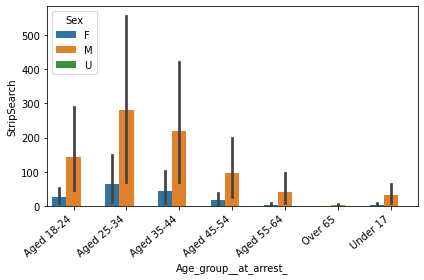

In [30]:
ax = sns.barplot(data=stripSearchs, x="Age_group__at_arrest_", y="StripSearch", hue="Sex")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='StripSearch', ylabel='Perceived_Race'>

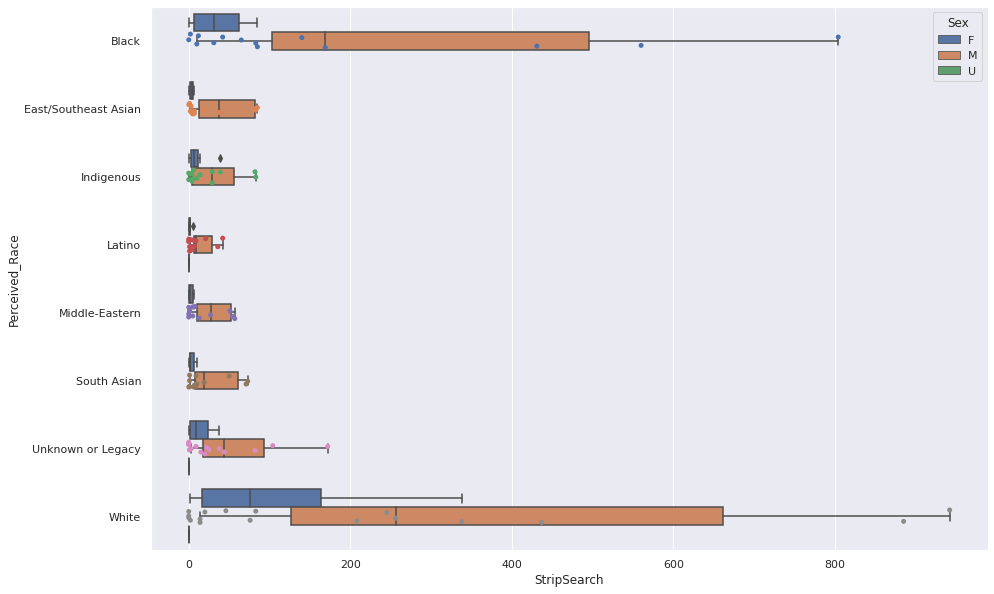

In [31]:
sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(data=stripSearchs, x="StripSearch", y="Perceived_Race", hue="Sex")
sns.stripplot(x='StripSearch', y='Perceived_Race', data=stripSearchs)

<AxesSubplot:xlabel='Booked', ylabel='Perceived_Race'>

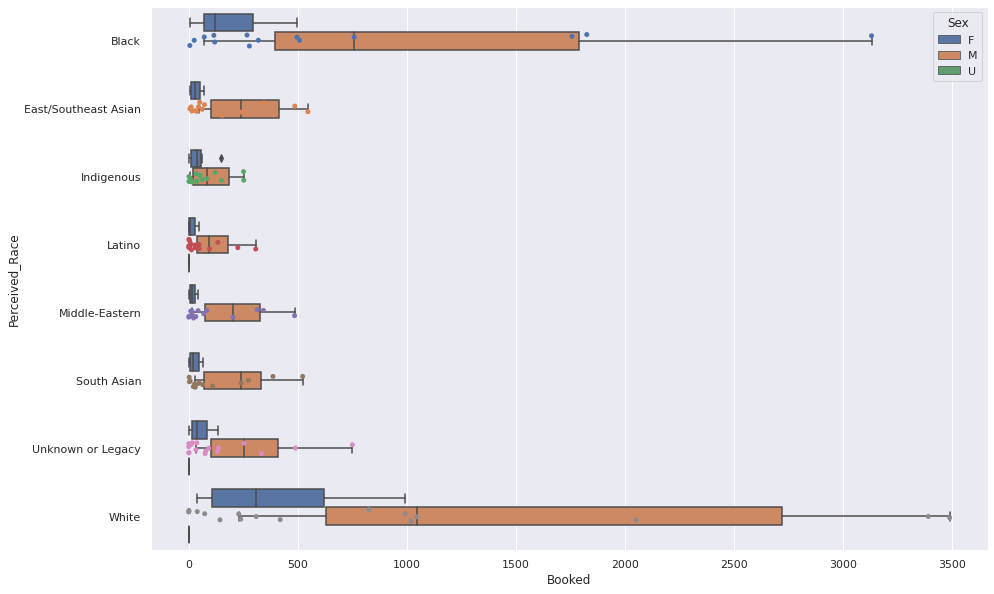

In [32]:
sns.boxplot(data=stripSearchs, x="Booked", y="Perceived_Race", hue="Sex")
sns.stripplot(x='Booked', y='Perceived_Race', data=stripSearchs)

<AxesSubplot:xlabel='Perceived_Race', ylabel='StripSearch'>

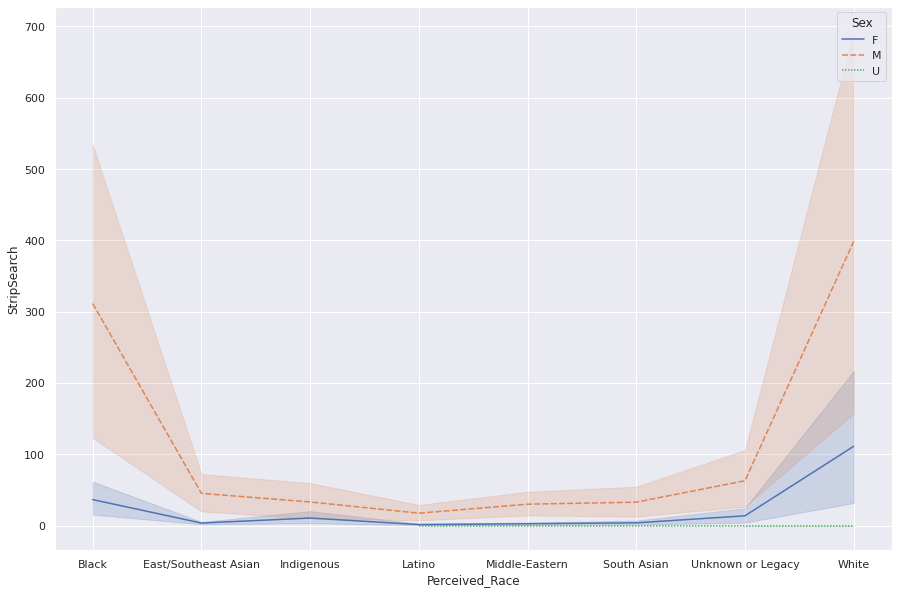

In [33]:
sns.lineplot(data=stripSearchs, x="Perceived_Race", y="StripSearch", hue="Sex", style="Sex")

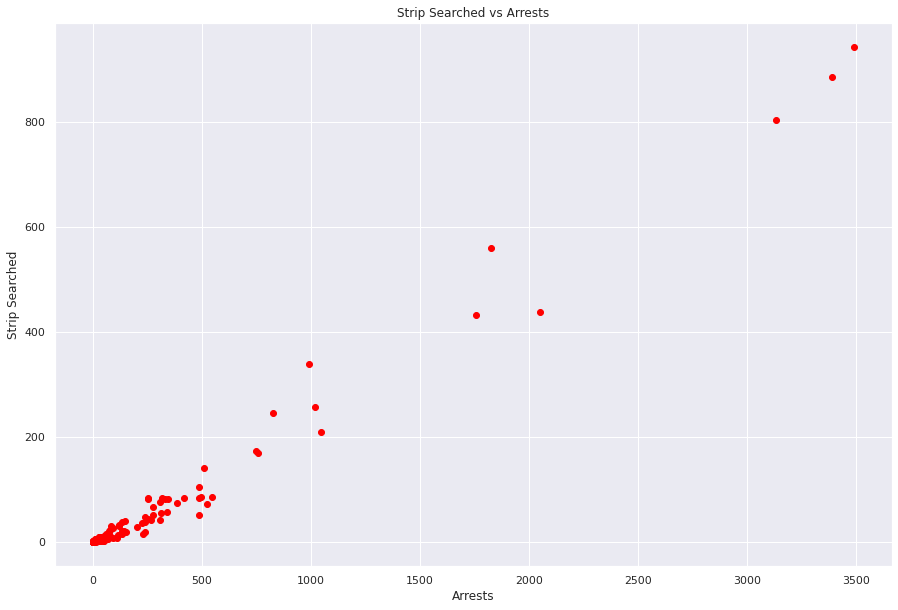

In [34]:
plt.scatter(stripSearchs['Booked'], stripSearchs['StripSearch'], color='red')

plt.xlabel("Arrests")
plt.ylabel("Strip Searched")
plt.title("Strip Searched vs Arrests")
plt.show()

In [35]:
#
stripRaceSexIntModel = ols('StripSearch ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data = stripSearchs).fit()
sm.stats.anova_lm(stripRaceSexIntModel, typ=2)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Sex),2.951778e+05,2.0,9.568373,0.000158
C(Perceived_Race),1.072376e+06,7.0,9.931923,0.000009
C(Sex):C(Perceived_Race),6.128018e+05,14.0,2.837765,0.003809
Residual,1.542466e+06,100.0,NaN,NaN


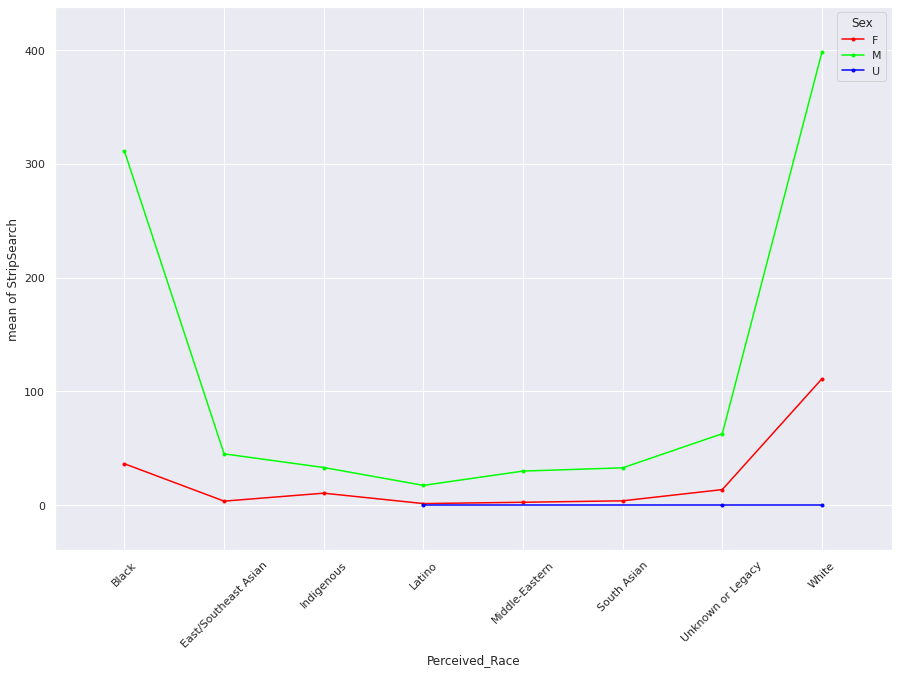

In [36]:
#Plot an interaction plot
fig = interaction_plot(x = stripSearchs['Perceived_Race'], trace = stripSearchs['Sex'], response = stripSearchs['StripSearch'])
plt.xticks(rotation=45)
plt.show()

In [37]:
#Two-way ANOVA without interaction
stripRaceSexModel = ols('StripSearch ~ C(Sex) + C(Perceived_Race)', data = stripSearchs).fit()
sm.stats.anova_lm(stripRaceSexModel, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),3.359779e+05,2.0,9.408337,0.000170
C(Perceived_Race),7.608431e+05,7.0,6.087364,0.000005
Residual,1.946231e+06,109.0,NaN,NaN


In [39]:
stripSearchs['Sex'] = pd.factorize(stripSearchs['Sex'])[0]
stripSearchs

,Perceived_Race,Sex,Age_group__at_arrest_,StripSearch,ItemsFound,Booked
0,Black,0,Aged 18-24,83,41.0,319
1,Black,0,Aged 25-34,85,29.0,496
2,Black,0,Aged 35-44,42,20.0,267
3,Black,0,Aged 45-54,31,15.0,119
4,Black,0,Aged 55-64,2,2.0,25
...,...,...,...,...,...,...
114,White,1,Over 65,14,5.0,229
115,White,1,Under 17,46,17.0,238
116,White,2,Aged 18-24,0,0.0,0
117,White,2,Aged 25-34,0,0.0,1


In [40]:
#
f_oneway(stripSearchs['Sex'], stripSearchs['StripSearch'])

F_onewayResult(statistic=19.858378400459383, pvalue=1.2888886143426989e-05)

In [41]:
tukey = pairwise_tukeyhsd(endog=stripSearchs["StripSearch"], groups=stripSearchs['Sex'], alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper   reject
-------------------------------------------------------
     0      1  93.4643 0.0045   24.9176  162.011   True
     0      2 -22.9107    0.9 -168.3202 122.4987  False
     1      2 -116.375 0.1432 -261.7845  29.0345  False
-------------------------------------------------------


In [42]:
bookedRaceSexIntModel = ols('Booked ~ C(Sex) + C(Perceived_Race) + C(Sex):C(Perceived_Race)', data = stripSearchs).fit()
sm.stats.anova_lm(bookedRaceSexIntModel, typ=2)

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 3
  warnings.warn('covariance of constraints does not have full '
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:1832: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 14, but rank is 10
  warnings.warn('covariance of constraints does not have full '


,sum_sq,df,F,PR(>F)
C(Sex),5.740725e+06,2.0,13.810559,0.000005
C(Perceived_Race),1.521349e+07,7.0,10.456953,0.000005
C(Sex):C(Perceived_Race),9.086819e+06,14.0,3.122902,0.001659
Residual,2.078383e+07,100.0,NaN,NaN


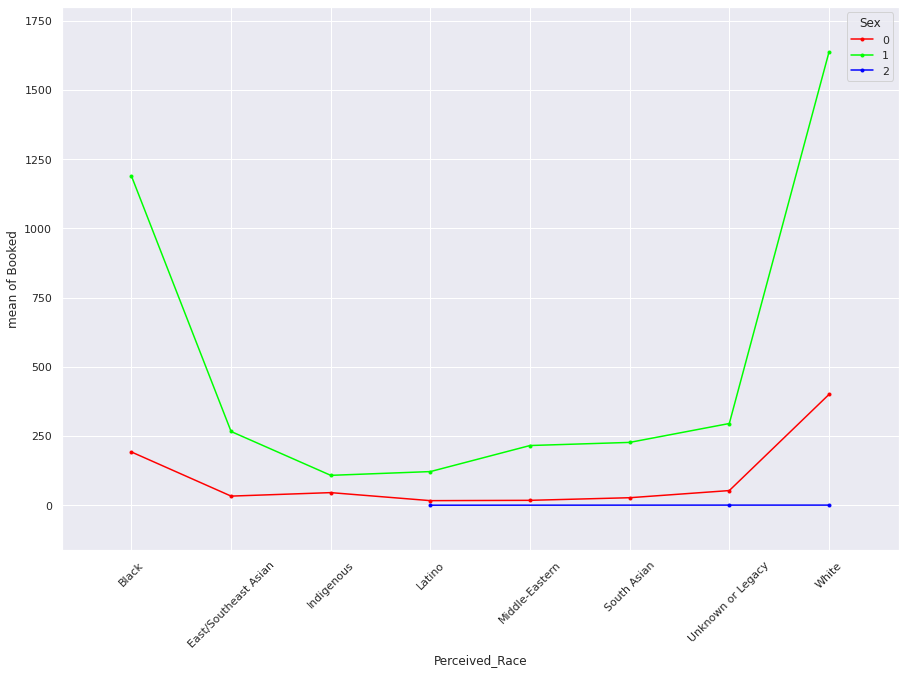

In [43]:
#Plot an interaction plot
fig = interaction_plot(x = stripSearchs['Perceived_Race'], trace = stripSearchs['Sex'], response = stripSearchs['Booked'])
plt.xticks(rotation=45)
plt.show()

In [44]:
#Two-way ANOVA without interaction
bookedRaceSexModel = ols('Booked ~ C(Sex) + C(Perceived_Race)', data = stripSearchs).fit()
sm.stats.anova_lm(bookedRaceSexModel, typ=2)

,sum_sq,df,F,PR(>F)
C(Sex),6.231389e+06,2.0,12.697245,0.000011
C(Perceived_Race),1.113641e+07,7.0,6.483387,0.000002
Residual,2.674680e+07,109.0,NaN,NaN


In [45]:
f_oneway(stripSearchs['Sex'], stripSearchs['Booked'])

F_onewayResult(statistic=26.291701071708637, pvalue=6.1160661530168e-07)

In [46]:
tukey = pairwise_tukeyhsd(endog=stripSearchs["Booked"], groups=stripSearchs['Sex'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  409.3036  0.001   152.8789 665.7282   True
     0      2  -97.7679    0.9  -641.7267  446.191  False
     1      2 -507.0714 0.0732 -1051.0303  36.8874  False
---------------------------------------------------------


In [47]:
f_oneway(stripSearchs['StripSearch'], stripSearchs['Booked'])

F_onewayResult(statistic=14.63911012133458, pvalue=0.00016673619017817636)

In [48]:
#Two-way ANOVA without interaction
stripRaceSexModel = ols('Booked ~ C(StripSearch) + C(Perceived_Race)', data = stripSearchs).fit()
sm.stats.anova_lm(stripRaceSexModel, typ=2)

,sum_sq,df,F,PR(>F)
C(StripSearch),3.291711e+07,53.0,589.751877,1.357488e-64
C(Perceived_Race),1.674163e+04,7.0,2.271032,4.096870e-02
Residual,6.108077e+04,58.0,NaN,NaN


In [49]:
tukey = pairwise_tukeyhsd(endog=stripSearchs["Booked"], groups=stripSearchs['Sex'], alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     0      1  409.3036  0.001   152.8789 665.7282   True
     0      2  -97.7679    0.9  -641.7267  446.191  False
     1      2 -507.0714 0.0732 -1051.0303  36.8874  False
---------------------------------------------------------


In [50]:
tukey = pairwise_tukeyhsd(endog=stripSearchs["Booked"], groups=stripSearchs['Perceived_Race'], alpha=0.05)
print(tukey)

                 Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
       group1               group2         meandiff p-adj    lower      upper   reject
--------------------------------------------------------------------------------------
               Black East/Southeast Asian -541.1429 0.1576 -1177.6215   95.3357  False
               Black           Indigenous -614.0714 0.0671   -1250.55   22.4072  False
               Black               Latino  -626.381 0.0496 -1252.1617   -0.6002   True
               Black       Middle-Eastern -574.1429  0.109 -1210.6215   62.3357  False
               Black          South Asian -563.7857 0.1231 -1200.2643   72.6929  False
               Black    Unknown or Legacy -547.3613 0.1102 -1155.1117    60.389  False
               Black                White  147.9328    0.9  -459.8175  755.6831  False
East/Southeast Asian           Indigenous  -72.9286    0.9  -709.4072    563.55  False
East/Southeast Asian               Latino  